### Importing the useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

### Loading and reading the dataset

In [2]:
liga_df = pd.read_csv('Laliga.csv')
liga_df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [3]:
liga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            61 non-null     int64 
 1   Team           61 non-null     object
 2   Seasons        61 non-null     int64 
 3   Points         61 non-null     object
 4   GamesPlayed    61 non-null     object
 5   GamesWon       61 non-null     object
 6   GamesDrawn     61 non-null     object
 7   GamesLost      61 non-null     object
 8   GoalsFor       61 non-null     object
 9   GoalsAgainst   61 non-null     object
 10  Champion       61 non-null     object
 11  Runner-up      61 non-null     object
 12  Third          61 non-null     object
 13  Fourth         61 non-null     object
 14  Fifth          61 non-null     object
 15  Sixth          61 non-null     object
 16  T              61 non-null     object
 17  Debut          61 non-null     object
 18  Since/LastApp  61 non-null     o

### Data pre-processing:-

In [4]:
#Replacing the "-" values with null
liga_df.replace('-',np.nan,inplace = True)

In [5]:
# % of null values in each column
liga_df.isnull().sum()/len(liga_df)*100

Pos               0.000000
Team              0.000000
Seasons           0.000000
Points            1.639344
GamesPlayed       1.639344
GamesWon          1.639344
GamesDrawn        1.639344
GamesLost         1.639344
GoalsFor          1.639344
GoalsAgainst      1.639344
Champion         85.245902
Runner-up        78.688525
Third            70.491803
Fourth           63.934426
Fifth            59.016393
Sixth            54.098361
T                45.901639
Debut             0.000000
Since/LastApp     0.000000
BestPosition      0.000000
dtype: float64

In [6]:
liga_df.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object')

In [7]:
#removing the hypen(-) and considering only the first year
liga_df['Debut'] = liga_df['Debut'].apply(lambda x:x.split('-')[0])
liga_df['Since/LastApp'] = liga_df['Since/LastApp'].apply(lambda x:x.split('-')[0])

In [8]:
liga_df[['Pos', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon','GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion','Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut','Since/LastApp']]=liga_df[['Pos', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon','GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion','Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut','Since/LastApp']].apply(pd.to_numeric)

In [9]:
liga_df.dtypes

Pos                int64
Team              object
Seasons            int64
Points           float64
GamesPlayed      float64
GamesWon         float64
GamesDrawn       float64
GamesLost        float64
GoalsFor         float64
GoalsAgainst     float64
Champion         float64
Runner-up        float64
Third            float64
Fourth           float64
Fifth            float64
Sixth            float64
T                float64
Debut              int64
Since/LastApp      int64
BestPosition       int64
dtype: object

In [84]:
# summury statistics for numerical columns
liga_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos,61.0,31.000000,17.752934,1.000000,16.000000,31.000000,46.000000,61.000000
Seasons,61.0,24.000000,26.827225,1.000000,4.000000,12.000000,38.000000,86.000000
Points,60.0,916.450000,1138.342899,14.000000,104.250000,395.500000,1360.500000,4385.000000
GamesPlayed,60.0,810.100000,877.465393,30.000000,115.500000,424.500000,1345.500000,2762.000000
GamesWon,60.0,309.033333,408.481395,5.000000,34.750000,124.000000,432.750000,1647.000000
GamesDrawn,60.0,192.083333,201.985508,4.000000,26.250000,98.500000,331.500000,633.000000
GamesLost,60.0,308.816667,294.508639,15.000000,62.750000,197.500000,563.500000,1070.000000
GoalsFor,60.0,1159.350000,1512.063948,34.000000,154.500000,444.000000,1669.750000,5947.000000
GoalsAgainst,60.0,1159.233333,1163.946914,55.000000,236.000000,632.500000,2001.250000,3889.000000
Champion,9.0,9.666667,11.618950,1.000000,1.000000,6.000000,10.000000,33.000000


#### 1.Which are the teams which started playing between 1930-1980?

In [86]:
print('These are the teams which started playing between 1930-1980:')
liga_df[liga_df['Debut'].between(1930,1980)][['Team']]

These are the teams which started playing between 1930-1980:


,Team
3,Valencia
5,Sevilla
8,Zaragoza
9,Real Betis
10,Deportivo La Coruna
11,Celta Vigo
12,Valladolid
14,Sporting Gijon
15,Osasuna
16,Malaga


#### 2.Which are the top 5 teams in terms of points?

In [12]:
print('The top 5 teams in terms of points:')
liga_df.sort_values('Points',ascending = False)['Team'].head()

The top 5 teams in terms of points:


0        Real Madrid
1          Barcelona
2    Atletico Madrid
3           Valencia
4    Athletic Bilbao
Name: Team, dtype: object

#### 3.What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage?(Winning percentage= (GamesWon / GamesPlayed)*100)

In [14]:
liga_df['Winning%'] = (liga_df['GamesWon']/liga_df['GamesPlayed'])*100

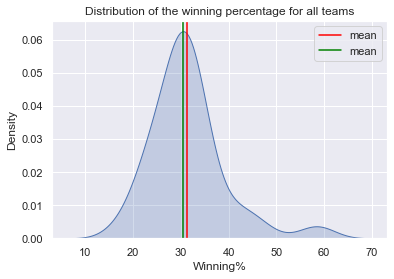

The distribution is slightly right-skewed.


In [15]:
sns.set(style='darkgrid')
sns.kdeplot(liga_df['Winning%'],shade = True)
plt.axvline(liga_df['Winning%'].mean(),color='red',label='mean')
plt.axvline(liga_df['Winning%'].median(),color='green',label='mean')
plt.title('Distribution of the winning percentage for all teams')
plt.legend()
plt.show()
print('The distribution is slightly right-skewed.')

In [16]:
print('The top 5 teams in terms of winning%')
liga_df.sort_values('Winning%',ascending = False)['Team'].head()

The top 5 teams in terms of winning%


0        Real Madrid
1          Barcelona
2    Atletico Madrid
3           Valencia
4    Athletic Bilbao
Name: Team, dtype: object

#### 4.Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [17]:
print('The list of the teams which have attained best position between 1-3:')
df13 = liga_df[liga_df['BestPosition'].between(1,3)][['Team','Winning%']]
df13

The list of the teams which have attained best position between 1-3:


,Team,Winning%
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629
5,Sevilla,41.112957
6,Espanyol,36.100533
7,Real Sociedad,37.532580
8,Zaragoza,35.146022
9,Real Betis,35.069444


In [18]:
print('The list of the teams which have attained best position between 4-7:')
df47 = liga_df[liga_df['BestPosition'].between(4,7)][['Team','Winning%']]
df47

The list of the teams which have attained best position between 4-7:


,Team,Winning%
11,Celta Vigo,34.511190
12,Valladolid,31.582538
15,Osasuna,32.321700
16,Malaga,31.075697
21,Granada,29.380054
23,Elche,29.941003
24,Getafe,32.236842
25,Hercules,29.299363
26,Tenerife,31.376518
28,Alaves,32.894737


In [19]:
pos13 = df13['Winning%']
pos13

0     59.630702
1     57.241130
2     47.475134
3     44.557057
4     43.772629
5     41.112957
6     36.100533
7     37.532580
8     35.146022
9     35.069444
10    36.797386
13    31.722689
14    32.304527
17    34.228188
18    33.704453
19    33.485401
20    41.176471
44    33.076923
Name: Winning%, dtype: float64

In [20]:
pos47 = df47['Winning%']
pos47

11    34.511190
12    31.582538
15    32.321700
16    31.075697
21    29.380054
23    29.941003
24    32.236842
25    29.299363
26    31.376518
28    32.894737
29    28.109453
30    29.078014
31    30.281690
33    27.745665
34    30.838323
35    28.148148
37    29.078014
41    29.444444
46    29.310345
51    29.166667
Name: Winning%, dtype: float64

In [21]:
import scipy.stats as stats
from scipy.stats import ttest_ind,shapiro,mannwhitneyu,wilcoxon

In [57]:
#To check whether winning % for the best position between 1-3 is normal or not
print(f'From the test statistics {shapiro(pos13)} we see that the p_value < 0.05 hence data pos13 is normally distributed ')

From the test statistics (0.8252524733543396, 0.003532945876941085) we see that the p_value < 0.05 hence data pos13 is normally distributed 


In [55]:
print(f'From the test statistics {shapiro(pos47)} we see that the p_value > 0.05 hence data pos47 is not normally distributed ')

From the test statistics (0.9436671733856201, 0.2809881269931793) we see that the p_value > 0.05 hence data pos47 is not normally distributed 


H0:- mu(pos13) = mu(pos47)
There is no significant difference in winning% between the teams which have attained best position between 1-3 and 4-7.

Ha:- mu(pos13) != mu(pos47)
There is a significant difference in winning% between the teams which have attained best position between 1-3 and 4-7.    

In [58]:
print('Out of the two data sets pos13 and pos47,pos 13 is normal while pos47 is not normal, therefore we perform the non-parametric t-test for independent groups.')
print(f'From the test statistics, {mannwhitneyu(pos13,pos47)} we see that the p_value < 0.05 hence we can conclude that there is a significant difference in winning% between the teams which have attained best position between 1-3 and 4-7.')      

Out of the two data sets pos13 and pos47,pos 13 is normal while pos47 is not normal, therefore we perform the non-parametric t-test for independent groups
From the test statistics, MannwhitneyuResult(statistic=11.0, pvalue=4.1876636593687686e-07) we see that the p_value < 0.05 hence we can conclude that there is a significant difference in winning% between the teams which have attained best position between 1-3 and 4-7.


### 2.A study was done to measure the blood pressure of 60 year old women with glaucoma.A random sample of 200 60-year old women with glaucoma was chosen.The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

#### a) Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [25]:
n = 200
sd = 25 
X_bar = 140

In [26]:
SEM = sd/np.sqrt(n)
print('The estimated standard error of the sample mean is',SEM)
print('Standard error indicates the deviation of the sample mean from the true mean of the population.')

The estimated standard error of the sample mean is 1.7677669529663687
Standard error indicates the deviation of the sample mean from the true mean of the population.


#### b)Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

We need to compute $\overline{X} \quad \pm 1.96 \frac {\sigma} {\sqrt{n}}$ 

In [27]:
Z = np.abs(round(stats.norm.isf(0.025), 2))# alpha/2
Z

1.96

In [28]:
Lower_Interval = X_bar - (1.96 * SEM)
Upper_Interval = X_bar + (1.96 * SEM)
print(f'95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma lies within the range of {round(Lower_Interval,3)}mm Hg to {round(Upper_Interval,3)}mm Hg.')

95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma lies within the range of 136.535mm Hg to 143.465mm Hg.


#### c)Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [29]:
n = 100
x_bar = 140
sd = 25
SEM = sd/np.sqrt(n)
SEM

2.5

In [30]:
Lower_Interval = X_bar - (1.96 * SEM)
Upper_Interval = X_bar + (1.96 * SEM)
print(f'95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma lies within the range of {round(Lower_Interval,3)}mm Hg to {round(Upper_Interval,3)}mm Hg.')

95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma lies within the range of 135.1mm Hg to 144.9mm Hg.


#### d)	Which of the two above intervals are wider?

Result:- Out of the above two problems,where in one the sample size=200 and in other the sample size=100,the interval is wider for the sample size = 100

#### e)Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

Inference:-As the sample size increases, the SEM value decreases therefore the range between which the population mean lies also increases.

We know that SEM = sd/np.sqrt(n), so as the value of the denominator(n) increases, the SEM value decreases i.e as the sample size increases sample mean becomes more close towards the population mean and the data is less spreaded or in other words we can say that we are able to predict the population mean with less error.

### 3.One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

In [31]:
golf_df = pd.read_csv('Golf.csv')
golf_df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [32]:
golf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Current  40 non-null     int64
 1   New      40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


#### 1.Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

In [33]:
Dist_old_ball = golf_df['Current']
Dist_new_ball = golf_df['New']

H0:-Xob_bar = Xnb_bar.
There is no such significant difference in the mean driving distance between both the balls after providing new coating.

Ha:-Xob_bar != Xnb_bar.
There is significant difference in the mean driving distance between both the balls after providing new coating.


#### 2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

Test for normality:-
H0:- The data is normal
Ha:- The data is not normal    

In [54]:
print(f'From the test statistics {shapiro(Dist_old_ball)} we see that the p_value > 0.05 hence data for old_ball is not normally distributed ')

From the test statistics (0.9707046747207642, 0.378787100315094) we see that the p_value > 0.05 hence data for old_ball is not normally distributed 


In [53]:
print(f'From the test statistics {shapiro(Dist_new_ball)} we see that the p_value > 0.05 hence data for new_ball is not normally distributed ')

From the test statistics (0.9678263664245605, 0.3064655363559723) we see that the p_value > 0.05 hence data for new_ball is not normally distributed 


In [83]:
print('Out the two data sets, we see that data for uncoated balls and coated balls are not normally distributed, therefore we perform the non-parametric t-test for dependent groups')
print(f'From the test statistics {wilcoxon(Dist_old_ball,Dist_new_ball)}, we see that as the p_value is > 0.05, hence we can conclude that there is no such significant difference in the mean driving distance between both the balls after providing new coating.')

Out the two data sets, we see that data for uncoated balls and coated balls are not normally distributed, therefore we perform the non-parametric t-test for dependent groups
From the test statistics WilcoxonResult(statistic=291.5, pvalue=0.2516033447950283), we see that as the p_value is > 0.05, hence we can conclude that there is no such significant difference in the mean driving distance between both the balls after providing new coating.


#### 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [52]:
Z = round(stats.norm.isf(0.025),2)# as alpha = 0.05
Z

1.96

In [36]:
Xob_bar=np.mean(Dist_old_ball)
sd1 = np.std(Dist_old_ball)
n1=40
Xob_bar,sd1,n1

(270.275, 8.642880017679293, 40)

In [76]:
LI = Xob_bar - Z*sd1/np.sqrt(n1)
UI = Xob_bar + Z*sd2/np.sqrt(n2)
print(f'95% confidence interval for the population mean of the uncoated ball lies within the range {round(LI,3)} to {round(UI,3)}')

95% confidence interval for the population mean of the uncoated ball lies within the range 267.597 to 273.304


In [39]:
Xnb_bar=np.mean(Dist_new_ball)
sd2=np.std(Dist_new_ball)
n2=40
Xnb_bar,sd2,n2

(267.5, 9.772410142846033, 40)

In [75]:
LI = Xnb_bar - Z*sd1/np.sqrt(n1)
UI = Xnb_bar + Z*sd2/np.sqrt(n2)
print(f'95% confidence interval for the population mean of the coated ball lies within the range {round(LI,3)} to {round(UI,3)}')

95% confidence interval for the population mean of the coated ball lies within the range 264.822 to 270.529


In [41]:
diff = Xob_bar - Xnb_bar
diff

2.7749999999999773

In [82]:
lb = diff-Z*np.sqrt((np.power(sd1,2)/n1)+(np.power(sd2,2)/n2))
Ub = diff+Z*np.sqrt((np.power(sd1,2)/n1)+(np.power(sd2,2)/n2))                    
lb,Ub 
print(f'95% confidence interval for the difference between the mean driving distance of the two varieties of the ball lies within the range {round(lb,3)} to {round(Ub,3)}')

95% confidence interval for the difference between the mean driving distance of the two varieties of the ball lies within the range -1.268 to 6.818


### Thank you!